# A3: Visualization for Exploratory Data Analysis

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Objective

The main focus of [this course](https://courses.cs.sfu.ca/2022sp-cmpt-733-g1) is on data science. [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf) gave you an overview of Visualization. After completing this assignment, you should be able to confidently perform visual data analysis using Python and gain some experience with geospatial data.

As a motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

## Real Estate EDA

**Real estate data**

Imagine you are data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided in [property_tax_report_2021.zip](property_tax_report_2021.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2021.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [2]:
# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("data/property_tax_report_2021.csv", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

Now let's start the EDA process. 

**Hint.** For some of the following questions, we provided an example plot (see [link](https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A3/A3-plots.html)). But note that you do not have to use the same plot design. In fact, we didn't do a good job to follow the *Principles of Visualization Design* in the second half of the slides of [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf), please review this part by yourself.
You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [3]:
# --- Write your code below ---
df.head(5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,002-582-759,STRATA,90717090036,9071709,CD-1 (94),Comprehensive Development,36,VAS452,NaN,526,...,2021.0,1015000.0,115000.0,1977.0,1977.0,3644.37,4,2021,1247000.0,1130000.0
1,010-772-278,LAND,692077380000,69207738,RS-1,One-Family Dwelling,22,VAP6923,511,526,...,2021.0,2759000.0,463000.0,1991.0,1991.0,12528.80,4,2021,3421000.0,3222000.0
2,009-746-986,LAND,79715270000,7971527,RS-1,One-Family Dwelling,8,VAP9119,560,526,...,2021.0,2958000.0,278000.0,1955.0,1975.0,11602.60,4,2021,3488000.0,3236000.0
3,008-199-809,LAND,742030860000,74203086,RS-5,One-Family Dwelling,12,VAP5959,18,2027,...,2021.0,3204000.0,521000.0,1989.0,1989.0,15046.20,3,2021,3920000.0,3725000.0
4,004-429-435,LAND,723032140000,72303214,RS-5,One-Family Dwelling,32,VAP4499,60,2027,...,2021.0,2720000.0,256000.0,1986.0,1986.0,11135.00,3,2021,3122000.0,2976000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [4]:
# --- Write your code below ---
df.describe().style.format('{:.2f}')

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,650847.00,650847.00,649178.00,642149.00,642149.00,642149.00,634890.00,634890.00,622538.00,622538.00,426393.00,650847.00,650847.00,642149.00,634890.00
mean,498730471748.25,49873047.17,2381.41,1709920.16,436542.00,2021.01,1714975.90,408908.72,1983.35,1990.93,8356.72,16.54,2021.01,2146462.15,2123884.61
std,249280578035.74,24928057.81,1989.22,9876736.00,4424333.36,0.82,9868571.45,4087834.81,29.63,19.49,57341.15,8.95,0.82,12132261.01,11923651.16
min,19632060000.00,1963206.00,1.00,0.00,0.00,2020.00,0.00,0.00,1800.00,200.00,0.00,1.00,2020.00,0.00,0.00
25%,210710030034.00,21071003.00,939.00,481000.00,101000.00,2020.00,480000.00,97200.00,1972.00,1980.00,1911.31,9.00,2020.00,669000.00,664000.00
50%,612275650000.00,61227565.00,1777.00,956000.00,193000.00,2021.00,963000.00,186000.00,1993.00,1994.00,3926.26,16.00,2021.00,1183000.00,1178000.00
75%,690033505000.00,69003350.50,3336.00,1576000.00,317000.00,2022.00,1516000.00,305000.00,2005.00,2005.00,6589.01,25.00,2022.00,1872000.00,1803000.00
max,845313420000.00,84531342.00,31888.00,3488433000.00,693426000.00,2022.00,3165054000.00,652775000.00,2019.00,2019.00,8621182.00,30.00,2022.00,3496582000.00,3172855000.00


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [5]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
missing_value = df['YEAR_BUILT'].isnull().sum()*100 / len(df)
print("Missing Value : {:.2f} %".format(missing_value))

Missing Value : 4.35 %


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1900 to 2018)?" Please plot a line chart to answer the question.

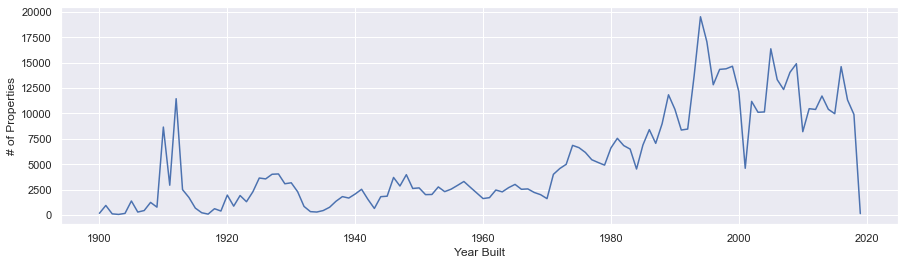

In [11]:
# --- Write your code below ---
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,4)})

filtered_data = df[(df['YEAR_BUILT']>=1900) & (df['YEAR_BUILT']<=2020)]

properties_count = filtered_data.groupby(['YEAR_BUILT']).size().reset_index(name='COUNT')

chart_plot = sns.lineplot(data=properties_count, x="YEAR_BUILT", y="COUNT")
axes_ticks = chart_plot.set(xlabel='Year Built', ylabel='# of Properties')

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. The maximum number of properties were built in the year 1994.
2. In the year 1910, there was a sudden and steep rise in the number of properties built which was abnormal compared to previous years.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

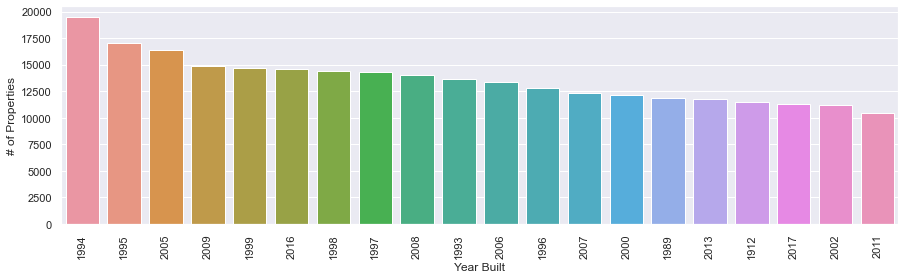

In [12]:
# --- Write your code below ---
top_properties = properties_count.nlargest(20, 'COUNT')
top_properties = top_properties.astype(int)
bar_chart = sns.barplot(x='YEAR_BUILT', y='COUNT', data=top_properties, \
                        order=top_properties.sort_values('COUNT', ascending=False).YEAR_BUILT)

x_ticks = bar_chart.set_xticklabels(bar_chart.get_xticklabels(),rotation = 90)
axes_ticks = bar_chart.set(xlabel='Year Built', ylabel='# of Properties')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. In the above bar chart for top 20, the number of properties built each year is greater than 10000.
2. The number of positions occupied by years greater than or equal to 2000 in the top 20 chart is 11.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1990 and 2020? Please plot a histogram to answer this question.

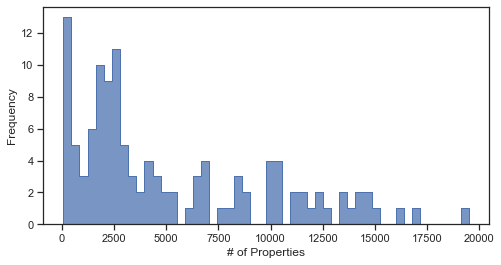

In [13]:
# --- Write your code below ---
sns.set(rc = {'figure.figsize':(8,4)})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

# The distribution chart shows the number of properties built between 1900 and 2020 as the same conditions followed 
# in the previous question.
distribution_chart = sns.histplot(data=properties_count, x='COUNT', bins=50, fill=True, element='step')
axes_ticks = distribution_chart.set(xlabel='# of Properties', ylabel='Frequency')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The distribution shows that during most of the years, the common number of properties built each year was around 2500.
2. The number of years with greater than 17500 properties built was less than 2.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

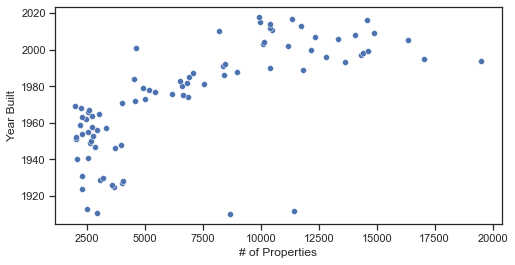

In [14]:
# --- Write your code below ---
year_count = properties_count[properties_count['COUNT']>2000]
scatter_chart = sns.scatterplot(data=year_count, x="COUNT", y="YEAR_BUILT")
axes_ticks = scatter_chart.set(xlabel='# of Properties', ylabel='Year Built')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. There are three outliers in the chart. Two outliers present at the bottom in the middle and one outlier towards the extreme right at the top.
2. The number of properties built per year started increasing after 1980.

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File May 2021**
* Download files: **pccfNat_fccpNat_052021.txt** and the [2021 PCCF Guide .pdf](https://abacus.library.ubc.ca/file.xhtml?persistentId=hdl:11272.1/AB2/9J8YUH/WJHERN&version=1.0) and place them in the same folder as this notebook.

#### Details about the dataset in the 2021 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11.  
  This is also included along with this notebook as **pccf_record_layout.csv**

In [15]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
displaymd(f"Number of lines in PCCF: {len(pclines):,}")

Number of lines in PCCF: 1,742,403

The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster.  
**TODO** write your improved code here.

In [16]:
# TODO: rewrite this function to make it run in about a minute (or just maybe 17 sec)
def gen_pccf():
    # Converting the list to pandas series for efficiency
    pc_series = pd.Series(pclines, dtype='string')
    # .itertuples() is faster than .iterrows()
    for rowvalue in rldf.itertuples(index=True):
        print(rowvalue[0], rowvalue[4])
        yield rowvalue[4], pc_series.str.slice(start=rowvalue[1]-1, stop=rowvalue[1]+rowvalue[2]-1)

# Extraction of substring to dataframe
pccf_df = pd.DataFrame(dict(gen_pccf()))

0 Postal code
1 FSA
2 PR
3 CDuid
4 CSDuid
5 CSDname
6 CSDtype
7 CCScode
8 SAC
9 SACtype
10 CTname
11 ER
12 DPL
13 FED13uid
14 POP_CNTR_RA
15 POP_CNTR_RA_type
16 DAuid
17 Dissemination block
18 Rep_Pt_Type
19 LAT
20 LONG
21 SLI
22 PCtype
23 Comm_Name
24 DMT
25 H_DMT
26 Birth_Date
27 Ret_Date
28 PO
29 QI
30 Source
31 POP_CNTR_RA_SIZE_CLASS


In [12]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

Phew, that was tedious! But now we're ready to merge geolocation to our property data.

In [13]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE,Postal code,LONG,LAT,CSDname
0,002-582-759,STRATA,90717090036,9071709,CD-1 (94),Comprehensive Development,36,VAS452,NaN,526,...,1977.0,3644.37,4,2021,1247000.0,1130000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
1,004-050-002,STRATA,90717090032,9071709,CD-1 (94),Comprehensive Development,32,VAS452,NaN,526,...,1982.0,3767.11,4,2021,1289000.0,1302000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
2,004-050-002,STRATA,90717090032,9071709,CD-1 (94),Comprehensive Development,32,VAS452,NaN,526,...,1982.0,3809.24,4,2020,1302000.0,1680000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
3,004-049-985,STRATA,90717090030,9071709,CD-1 (94),Comprehensive Development,30,VAS452,NaN,526,...,1977.0,3788.75,4,2020,1295000.0,1674000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
4,004-049-977,STRATA,90717090029,9071709,CD-1 (94),Comprehensive Development,29,VAS452,NaN,526,...,1977.0,3752.49,4,2021,1284000.0,1295000.0,V6L3C7,-123.154007,49.247557,Vancouver ...


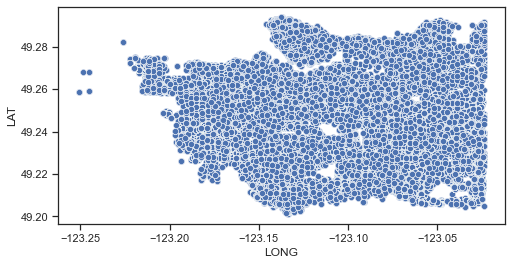

In [14]:
# TODO remove the properties that are further north, outside Vancouver proper.
# Use a suitable visualiation to decide the right cutoff.

# --- write your code here ---
sns.scatterplot(data=dfgeo, x="LONG", y="LAT")
dfgeo.head()

Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [15]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap is pretty much useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

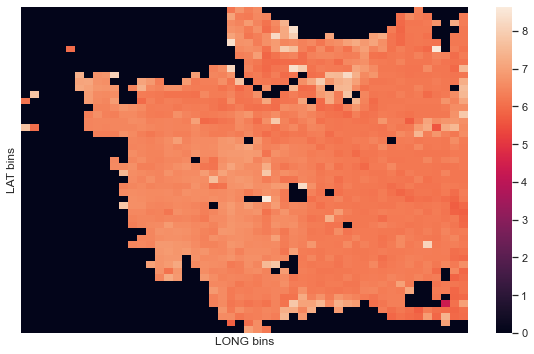

In [22]:
field = 'CURRENT_PRICE'
with plt.rc_context({'figure.figsize': (10,6)}):
    heatmap_df = heatmap_bins(dfgeo, ['LONG', 'LAT'], ncuts=50)
    sns.heatmap(np.log10(heatmap_df[field].fillna(1)))
    
plt.xticks([], []);
plt.yticks([], []);

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The average current property prices are higher in the northern part of the Vancouver.
2. There are more number of properties with low average current property prices in bottom right corner of the map.

### Optional Task 9: Further exploration

This Assignment is due while you're also working on your Blog posts. To give you enough time to do a good job on your article, we dropped a more involved Part 2.

If you want to go further after starting out with the spatial data above, have a look at the material and tutorials of Geoff Boeing's [OSMnx](https://github.com/gboeing/osmnx). It can interface with the open street map API and pull further data (such as amenities, road network, basemap to put in the background of a plot, etc.)

In case you decide to work on this and would like to share your result, include a single page (or short) PDF that contains a plot and brief paragraph explaining it. Depending on the outcome, we may showcase some of these works in class.

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A3.ipynb</font> to the CourSys activity [Assignment 3](https://courses.cs.sfu.ca/2022sp-cmpt-733-g1/+a3/). 